In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import os
import seaborn as sns
import plotly.offline as py
import plotly.io as pio
from scipy import stats
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sms
from statsmodels.compat import lzip
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline
from joblib import dump,load
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
df=pd.read_pickle(r'D:\GANIT\MOCK PROJECT\ADS_source.pkl')

In [3]:
pd.set_option('display.max_columns', 1500)
pd.set_option('display.max_rows', 1500)
pd.set_option('display.width', 500)

In [4]:
del df["ERROR_DESC"]
del df["unit_idx"]

In [5]:
df.rename(columns = {'die1_ DspPressure':'DspPressure','die1_ Area':'die1_Area','die1_ X':'die1_X','die1_ Y':'die1_Y'}, inplace = True)

In [6]:
df.drop(df.loc[df['amt']<0].index, inplace=True)
df.drop(df.loc[df['DspPressure']==0].index, inplace=True)
df.dropna(inplace=True)

In [7]:
df['Chip_Quality'] = df['die1_Area'].apply(lambda x: 'GOOD' if (x>=2.7 and x<=3.2) else 'BAD')

In [8]:
df=df.drop_duplicates(subset=['STRIPID','rows','cols'],keep='last')

In [9]:
df.drop(df[df['STRIPID'].str.contains('random')].index, inplace= True)

In [10]:
df

,datetime,DspPressure,rows,cols,die1_Area,die1_X,die1_Y,BATCHID,amt,STRIPID,Chip_Quality
12655,2021-01-11 12:42:45,86.0,2.0,3.0,2.889,153.74,128.43,9006721174-450,6.066884,LPA013700881,GOOD
12656,2021-01-11 12:42:45,86.0,1.0,3.0,2.938,173.16,126.00,9006721174-450,6.066884,LPA013700881,GOOD
12657,2021-01-11 12:42:45,86.0,5.0,3.0,3.010,127.05,-184.69,9006721174-450,6.066884,LPA013700881,GOOD
12658,2021-01-11 12:42:45,86.0,4.0,3.0,2.932,129.47,60.47,9006721174-450,6.066884,LPA013700881,GOOD
12659,2021-01-11 12:42:45,86.0,2.0,4.0,2.986,-64.68,-141.00,9006721174-450,6.066884,LPA013700881,GOOD
...,...,...,...,...,...,...,...,...,...,...,...
2443954,2021-02-01 00:01:17,92.0,5.0,20.0,2.899,186.78,-128.32,9006963474-88A,3.961644,LPA041930775,GOOD
2443955,2021-02-01 00:01:18,92.0,1.0,19.0,2.785,-29.11,410.35,9006963474-88A,3.961644,LPA041930775,GOOD
2443956,2021-02-01 00:01:18,92.0,1.0,20.0,2.821,293.51,-21.56,9006963474-88A,3.961644,LPA041930775,GOOD
2443957,2021-02-01 00:01:18,92.0,2.0,19.0,2.893,303.21,427.34,9006963474-88A,3.961644,LPA041930775,GOOD


In [11]:
asce=df.sort_values(["STRIPID","rows","cols"], ascending=(True))
asce

,datetime,DspPressure,rows,cols,die1_Area,die1_X,die1_Y,BATCHID,amt,STRIPID,Chip_Quality
1242921,2021-01-21 00:39:23,87.0,1.0,1.0,2.848,136.74,237.54,9006876091-202,4.441251,LEA030020001,GOOD
1242923,2021-01-21 00:39:23,87.0,1.0,2.0,2.890,63.92,-362.04,9006876091-202,4.441251,LEA030020001,GOOD
1242936,2021-01-21 00:39:38,87.0,1.0,3.0,2.938,151.31,298.22,9006876091-202,4.441251,LEA030020001,GOOD
1242939,2021-01-21 00:39:38,87.0,1.0,4.0,2.920,-188.52,-359.61,9006876091-202,4.441251,LEA030020001,GOOD
1242947,2021-01-21 00:39:41,87.0,1.0,5.0,2.836,148.88,222.97,9006876091-202,4.441251,LEA030020001,GOOD
...,...,...,...,...,...,...,...,...,...,...,...
2385495,2021-01-31 13:22:38,92.0,5.0,16.0,3.002,-77.63,388.52,9006963474-411,3.821771,LPA041935029,GOOD
2385506,2021-01-31 13:22:41,92.0,5.0,17.0,3.008,55.79,-48.25,9006963474-411,3.821771,LPA041935029,GOOD
2385503,2021-01-31 13:22:41,92.0,5.0,18.0,2.977,-80.05,-128.32,9006963474-411,3.821771,LPA041935029,GOOD
2385514,2021-01-31 13:22:44,92.0,5.0,19.0,3.026,16.98,-43.39,9006963474-411,3.821771,LPA041935029,GOOD


In [12]:
odd = df.loc[(df['cols'] %2 != 0)]
odd

,datetime,DspPressure,rows,cols,die1_Area,die1_X,die1_Y,BATCHID,amt,STRIPID,Chip_Quality
12655,2021-01-11 12:42:45,86.0,2.0,3.0,2.889,153.74,128.43,9006721174-450,6.066884,LPA013700881,GOOD
12656,2021-01-11 12:42:45,86.0,1.0,3.0,2.938,173.16,126.00,9006721174-450,6.066884,LPA013700881,GOOD
12657,2021-01-11 12:42:45,86.0,5.0,3.0,3.010,127.05,-184.69,9006721174-450,6.066884,LPA013700881,GOOD
12658,2021-01-11 12:42:45,86.0,4.0,3.0,2.932,129.47,60.47,9006721174-450,6.066884,LPA013700881,GOOD
12660,2021-01-11 12:42:45,86.0,3.0,3.0,2.944,151.32,128.43,9006721174-450,6.066884,LPA013700881,GOOD
...,...,...,...,...,...,...,...,...,...,...,...
2443949,2021-02-01 00:01:17,92.0,3.0,19.0,2.809,-29.11,483.15,9006963474-88A,3.961644,LPA041930775,GOOD
2443950,2021-02-01 00:01:17,92.0,4.0,19.0,2.851,33.96,-162.29,9006963474-88A,3.961644,LPA041930775,GOOD
2443951,2021-02-01 00:01:17,92.0,5.0,19.0,2.845,-36.39,-186.56,9006963474-88A,3.961644,LPA041930775,GOOD
2443955,2021-02-01 00:01:18,92.0,1.0,19.0,2.785,-29.11,410.35,9006963474-88A,3.961644,LPA041930775,GOOD


In [13]:
even = df.loc[(df['cols'] %2 == 0)]
even

,datetime,DspPressure,rows,cols,die1_Area,die1_X,die1_Y,BATCHID,amt,STRIPID,Chip_Quality
12659,2021-01-11 12:42:45,86.0,2.0,4.0,2.986,-64.68,-141.00,9006721174-450,6.066884,LPA013700881,GOOD
12661,2021-01-11 12:42:45,86.0,3.0,4.0,2.944,-88.95,-97.31,9006721174-450,6.066884,LPA013700881,GOOD
12662,2021-01-11 12:42:45,86.0,5.0,4.0,2.992,-16.14,123.58,9006721174-450,6.066884,LPA013700881,GOOD
12663,2021-01-11 12:42:45,86.0,4.0,4.0,2.968,32.39,-364.30,9006721174-450,6.066884,LPA013700881,GOOD
12664,2021-01-11 12:42:45,86.0,1.0,4.0,2.980,37.25,-320.61,9006721174-450,6.066884,LPA013700881,GOOD
...,...,...,...,...,...,...,...,...,...,...,...
2443952,2021-02-01 00:01:17,92.0,3.0,20.0,2.785,293.51,-36.11,9006963474-88A,3.961644,LPA041930775,GOOD
2443953,2021-02-01 00:01:17,92.0,4.0,20.0,2.851,-77.63,-123.47,9006963474-88A,3.961644,LPA041930775,GOOD
2443954,2021-02-01 00:01:17,92.0,5.0,20.0,2.899,186.78,-128.32,9006963474-88A,3.961644,LPA041930775,GOOD
2443956,2021-02-01 00:01:18,92.0,1.0,20.0,2.821,293.51,-21.56,9006963474-88A,3.961644,LPA041930775,GOOD


In [14]:
even['cols']
even['cols_new'] = even['cols']
even['cols'] = even['cols']-1
even

<ipython-input-14-82a35606e7d7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-82a35606e7d7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,datetime,DspPressure,rows,cols,die1_Area,die1_X,die1_Y,BATCHID,amt,STRIPID,Chip_Quality,cols_new
12659,2021-01-11 12:42:45,86.0,2.0,3.0,2.986,-64.68,-141.00,9006721174-450,6.066884,LPA013700881,GOOD,4.0
12661,2021-01-11 12:42:45,86.0,3.0,3.0,2.944,-88.95,-97.31,9006721174-450,6.066884,LPA013700881,GOOD,4.0
12662,2021-01-11 12:42:45,86.0,5.0,3.0,2.992,-16.14,123.58,9006721174-450,6.066884,LPA013700881,GOOD,4.0
12663,2021-01-11 12:42:45,86.0,4.0,3.0,2.968,32.39,-364.30,9006721174-450,6.066884,LPA013700881,GOOD,4.0
12664,2021-01-11 12:42:45,86.0,1.0,3.0,2.980,37.25,-320.61,9006721174-450,6.066884,LPA013700881,GOOD,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2443952,2021-02-01 00:01:17,92.0,3.0,19.0,2.785,293.51,-36.11,9006963474-88A,3.961644,LPA041930775,GOOD,20.0
2443953,2021-02-01 00:01:17,92.0,4.0,19.0,2.851,-77.63,-123.47,9006963474-88A,3.961644,LPA041930775,GOOD,20.0
2443954,2021-02-01 00:01:17,92.0,5.0,19.0,2.899,186.78,-128.32,9006963474-88A,3.961644,LPA041930775,GOOD,20.0
2443956,2021-02-01 00:01:18,92.0,1.0,19.0,2.821,293.51,-21.56,9006963474-88A,3.961644,LPA041930775,GOOD,20.0


In [15]:
output = pd.merge(odd[['BATCHID','STRIPID','rows', 'cols','die1_X','die1_Y', 'die1_Area']],
                  even[['BATCHID','STRIPID','rows', 'cols', 'die1_X','die1_Y','die1_Area', 'cols_new']], 
                  how="outer", 
                  on=['BATCHID','STRIPID','rows', 'cols'])
output

,BATCHID,STRIPID,rows,cols,die1_X_x,die1_Y_x,die1_Area_x,die1_X_y,die1_Y_y,die1_Area_y,cols_new
0,9006721174-450,LPA013700881,2.0,3.0,153.74,128.43,2.889,-64.68,-141.00,2.986,4.0
1,9006721174-450,LPA013700881,1.0,3.0,173.16,126.00,2.938,37.25,-320.61,2.980,4.0
2,9006721174-450,LPA013700881,5.0,3.0,127.05,-184.69,3.010,-16.14,123.58,2.992,4.0
3,9006721174-450,LPA013700881,4.0,3.0,129.47,60.47,2.932,32.39,-364.30,2.968,4.0
4,9006721174-450,LPA013700881,3.0,3.0,151.32,128.43,2.944,-88.95,-97.31,2.944,4.0
...,...,...,...,...,...,...,...,...,...,...,...
1084461,9006888032-481B,LPA040990362,1.0,3.0,NaN,NaN,NaN,174.65,-182.01,2.948,4.0
1084462,9006888049-485,LPA040990309,1.0,11.0,NaN,NaN,NaN,-9.70,293.64,2.863,12.0
1084463,9006888049-485,LPA040990310,1.0,11.0,NaN,NaN,NaN,19.41,-259.66,2.936,12.0
1084464,9006963474-411,LPA041930104,5.0,13.0,NaN,NaN,NaN,152.82,63.37,2.983,14.0


In [16]:
output['Y_dev'] = abs(output['die1_Y_x']-output['die1_Y_y'])
output['X_dev'] = abs(output['die1_X_x']-output['die1_X_y'])
output['Area_dev'] = abs(output['die1_Area_x']-output['die1_Area_y'])
output

,BATCHID,STRIPID,rows,cols,die1_X_x,die1_Y_x,die1_Area_x,die1_X_y,die1_Y_y,die1_Area_y,cols_new,Y_dev,X_dev,Area_dev
0,9006721174-450,LPA013700881,2.0,3.0,153.74,128.43,2.889,-64.68,-141.00,2.986,4.0,269.43,218.42,0.097
1,9006721174-450,LPA013700881,1.0,3.0,173.16,126.00,2.938,37.25,-320.61,2.980,4.0,446.61,135.91,0.042
2,9006721174-450,LPA013700881,5.0,3.0,127.05,-184.69,3.010,-16.14,123.58,2.992,4.0,308.27,143.19,0.018
3,9006721174-450,LPA013700881,4.0,3.0,129.47,60.47,2.932,32.39,-364.30,2.968,4.0,424.77,97.08,0.036
4,9006721174-450,LPA013700881,3.0,3.0,151.32,128.43,2.944,-88.95,-97.31,2.944,4.0,225.74,240.27,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084461,9006888032-481B,LPA040990362,1.0,3.0,NaN,NaN,NaN,174.65,-182.01,2.948,4.0,NaN,NaN,NaN
1084462,9006888049-485,LPA040990309,1.0,11.0,NaN,NaN,NaN,-9.70,293.64,2.863,12.0,NaN,NaN,NaN
1084463,9006888049-485,LPA040990310,1.0,11.0,NaN,NaN,NaN,19.41,-259.66,2.936,12.0,NaN,NaN,NaN
1084464,9006963474-411,LPA041930104,5.0,13.0,NaN,NaN,NaN,152.82,63.37,2.983,14.0,NaN,NaN,NaN


In [17]:
output2 = pd.merge(df.copy(), 
                   output[['BATCHID','STRIPID','rows','cols','X_dev','Y_dev','Area_dev']], 
                   how="left", 
                   on=['BATCHID','STRIPID','rows', 'cols'])
output2

output.drop(['cols'], axis = 1, inplace = True)
output.rename(columns = {'cols_new' : 'cols'}, inplace = True)
output2 = output2.merge(output[['BATCHID','STRIPID','rows','cols','X_dev','Y_dev','Area_dev']], 
                   how="left", 
                   on=['BATCHID','STRIPID','rows','cols'])
output2

,datetime,DspPressure,rows,cols,die1_Area,die1_X,die1_Y,BATCHID,amt,STRIPID,Chip_Quality,X_dev_x,Y_dev_x,Area_dev_x,X_dev_y,Y_dev_y,Area_dev_y
0,2021-01-11 12:42:45,86.0,2.0,3.0,2.889,153.74,128.43,9006721174-450,6.066884,LPA013700881,GOOD,218.42,269.43,0.097,NaN,NaN,NaN
1,2021-01-11 12:42:45,86.0,1.0,3.0,2.938,173.16,126.00,9006721174-450,6.066884,LPA013700881,GOOD,135.91,446.61,0.042,NaN,NaN,NaN
2,2021-01-11 12:42:45,86.0,5.0,3.0,3.010,127.05,-184.69,9006721174-450,6.066884,LPA013700881,GOOD,143.19,308.27,0.018,NaN,NaN,NaN
3,2021-01-11 12:42:45,86.0,4.0,3.0,2.932,129.47,60.47,9006721174-450,6.066884,LPA013700881,GOOD,97.08,424.77,0.036,NaN,NaN,NaN
4,2021-01-11 12:42:45,86.0,2.0,4.0,2.986,-64.68,-141.00,9006721174-450,6.066884,LPA013700881,GOOD,NaN,NaN,NaN,218.42,269.43,0.097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168775,2021-02-01 00:01:17,92.0,5.0,20.0,2.899,186.78,-128.32,9006963474-88A,3.961644,LPA041930775,GOOD,NaN,NaN,NaN,223.17,58.24,0.054
2168776,2021-02-01 00:01:18,92.0,1.0,19.0,2.785,-29.11,410.35,9006963474-88A,3.961644,LPA041930775,GOOD,322.62,431.91,0.036,NaN,NaN,NaN
2168777,2021-02-01 00:01:18,92.0,1.0,20.0,2.821,293.51,-21.56,9006963474-88A,3.961644,LPA041930775,GOOD,NaN,NaN,NaN,322.62,431.91,0.036
2168778,2021-02-01 00:01:18,92.0,2.0,19.0,2.893,303.21,427.34,9006963474-88A,3.961644,LPA041930775,GOOD,2.42,478.01,0.072,NaN,NaN,NaN


In [18]:
output2.loc[output2.Area_dev_x.isnull(), 'Y_dev_x'] = output2.Y_dev_y
output2.loc[output2.Area_dev_x.isnull(), 'X_dev_x'] = output2.X_dev_y
output2.loc[output2.Area_dev_x.isnull(), 'Area_dev_x'] = output2.Area_dev_y
output2.drop(['Y_dev_y','X_dev_y','Area_dev_y'], axis = 1, inplace = True)
output2

output2.rename(columns = {'Y_dev_x' : 'Y_dev','X_dev_x' : 'X_dev','Area_dev_x' : 'Area_dev'}, inplace = True)
output2

,datetime,DspPressure,rows,cols,die1_Area,die1_X,die1_Y,BATCHID,amt,STRIPID,Chip_Quality,X_dev,Y_dev,Area_dev
0,2021-01-11 12:42:45,86.0,2.0,3.0,2.889,153.74,128.43,9006721174-450,6.066884,LPA013700881,GOOD,218.42,269.43,0.097
1,2021-01-11 12:42:45,86.0,1.0,3.0,2.938,173.16,126.00,9006721174-450,6.066884,LPA013700881,GOOD,135.91,446.61,0.042
2,2021-01-11 12:42:45,86.0,5.0,3.0,3.010,127.05,-184.69,9006721174-450,6.066884,LPA013700881,GOOD,143.19,308.27,0.018
3,2021-01-11 12:42:45,86.0,4.0,3.0,2.932,129.47,60.47,9006721174-450,6.066884,LPA013700881,GOOD,97.08,424.77,0.036
4,2021-01-11 12:42:45,86.0,2.0,4.0,2.986,-64.68,-141.00,9006721174-450,6.066884,LPA013700881,GOOD,218.42,269.43,0.097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168775,2021-02-01 00:01:17,92.0,5.0,20.0,2.899,186.78,-128.32,9006963474-88A,3.961644,LPA041930775,GOOD,223.17,58.24,0.054
2168776,2021-02-01 00:01:18,92.0,1.0,19.0,2.785,-29.11,410.35,9006963474-88A,3.961644,LPA041930775,GOOD,322.62,431.91,0.036
2168777,2021-02-01 00:01:18,92.0,1.0,20.0,2.821,293.51,-21.56,9006963474-88A,3.961644,LPA041930775,GOOD,322.62,431.91,0.036
2168778,2021-02-01 00:01:18,92.0,2.0,19.0,2.893,303.21,427.34,9006963474-88A,3.961644,LPA041930775,GOOD,2.42,478.01,0.072


In [19]:
output2=output2.sort_values("datetime", ascending = True)

In [20]:
output2["Combination"]=output2["rows"].astype(str)+"x"+output2["cols"].astype(str)+"x"+output2["STRIPID"]
output2

output2.drop_duplicates('Combination')

,datetime,DspPressure,rows,cols,die1_Area,die1_X,die1_Y,BATCHID,amt,STRIPID,Chip_Quality,X_dev,Y_dev,Area_dev,Combination
0,2021-01-11 12:42:45,86.0,2.0,3.0,2.889,153.74,128.43,9006721174-450,6.066884,LPA013700881,GOOD,218.42,269.43,0.097,2.0x3.0xLPA013700881
1,2021-01-11 12:42:45,86.0,1.0,3.0,2.938,173.16,126.00,9006721174-450,6.066884,LPA013700881,GOOD,135.91,446.61,0.042,1.0x3.0xLPA013700881
2,2021-01-11 12:42:45,86.0,5.0,3.0,3.010,127.05,-184.69,9006721174-450,6.066884,LPA013700881,GOOD,143.19,308.27,0.018,5.0x3.0xLPA013700881
3,2021-01-11 12:42:45,86.0,4.0,3.0,2.932,129.47,60.47,9006721174-450,6.066884,LPA013700881,GOOD,97.08,424.77,0.036,4.0x3.0xLPA013700881
4,2021-01-11 12:42:45,86.0,2.0,4.0,2.986,-64.68,-141.00,9006721174-450,6.066884,LPA013700881,GOOD,218.42,269.43,0.097,2.0x4.0xLPA013700881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168772,2021-02-01 00:01:17,92.0,5.0,19.0,2.845,-36.39,-186.56,9006963474-88A,3.961644,LPA041930775,GOOD,223.17,58.24,0.054,5.0x19.0xLPA041930775
2168777,2021-02-01 00:01:18,92.0,1.0,20.0,2.821,293.51,-21.56,9006963474-88A,3.961644,LPA041930775,GOOD,322.62,431.91,0.036,1.0x20.0xLPA041930775
2168778,2021-02-01 00:01:18,92.0,2.0,19.0,2.893,303.21,427.34,9006963474-88A,3.961644,LPA041930775,GOOD,2.42,478.01,0.072,2.0x19.0xLPA041930775
2168776,2021-02-01 00:01:18,92.0,1.0,19.0,2.785,-29.11,410.35,9006963474-88A,3.961644,LPA041930775,GOOD,322.62,431.91,0.036,1.0x19.0xLPA041930775


In [21]:
unit = []
batchid = "9006721174-450"
counter = 1
for value in output2["BATCHID"]:
    if(value==batchid):
        unit.append(counter)
        counter+=1
    elif (value!=batchid):
        batchid = value
        counter=1
        unit.append(counter)
        counter+=1
       
output2["unit"] = unit   
output2

,datetime,DspPressure,rows,cols,die1_Area,die1_X,die1_Y,BATCHID,amt,STRIPID,Chip_Quality,X_dev,Y_dev,Area_dev,Combination,unit
0,2021-01-11 12:42:45,86.0,2.0,3.0,2.889,153.74,128.43,9006721174-450,6.066884,LPA013700881,GOOD,218.42,269.43,0.097,2.0x3.0xLPA013700881,1
1,2021-01-11 12:42:45,86.0,1.0,3.0,2.938,173.16,126.00,9006721174-450,6.066884,LPA013700881,GOOD,135.91,446.61,0.042,1.0x3.0xLPA013700881,2
2,2021-01-11 12:42:45,86.0,5.0,3.0,3.010,127.05,-184.69,9006721174-450,6.066884,LPA013700881,GOOD,143.19,308.27,0.018,5.0x3.0xLPA013700881,3
3,2021-01-11 12:42:45,86.0,4.0,3.0,2.932,129.47,60.47,9006721174-450,6.066884,LPA013700881,GOOD,97.08,424.77,0.036,4.0x3.0xLPA013700881,4
4,2021-01-11 12:42:45,86.0,2.0,4.0,2.986,-64.68,-141.00,9006721174-450,6.066884,LPA013700881,GOOD,218.42,269.43,0.097,2.0x4.0xLPA013700881,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168772,2021-02-01 00:01:17,92.0,5.0,19.0,2.845,-36.39,-186.56,9006963474-88A,3.961644,LPA041930775,GOOD,223.17,58.24,0.054,5.0x19.0xLPA041930775,96
2168777,2021-02-01 00:01:18,92.0,1.0,20.0,2.821,293.51,-21.56,9006963474-88A,3.961644,LPA041930775,GOOD,322.62,431.91,0.036,1.0x20.0xLPA041930775,97
2168778,2021-02-01 00:01:18,92.0,2.0,19.0,2.893,303.21,427.34,9006963474-88A,3.961644,LPA041930775,GOOD,2.42,478.01,0.072,2.0x19.0xLPA041930775,98
2168776,2021-02-01 00:01:18,92.0,1.0,19.0,2.785,-29.11,410.35,9006963474-88A,3.961644,LPA041930775,GOOD,322.62,431.91,0.036,1.0x19.0xLPA041930775,99


In [22]:
output2.unit.max()

26606

In [23]:
output2["amt_used"]=output2["unit"]*output2["amt"]/1000
output2

,datetime,DspPressure,rows,cols,die1_Area,die1_X,die1_Y,BATCHID,amt,STRIPID,Chip_Quality,X_dev,Y_dev,Area_dev,Combination,unit,amt_used
0,2021-01-11 12:42:45,86.0,2.0,3.0,2.889,153.74,128.43,9006721174-450,6.066884,LPA013700881,GOOD,218.42,269.43,0.097,2.0x3.0xLPA013700881,1,0.006067
1,2021-01-11 12:42:45,86.0,1.0,3.0,2.938,173.16,126.00,9006721174-450,6.066884,LPA013700881,GOOD,135.91,446.61,0.042,1.0x3.0xLPA013700881,2,0.012134
2,2021-01-11 12:42:45,86.0,5.0,3.0,3.010,127.05,-184.69,9006721174-450,6.066884,LPA013700881,GOOD,143.19,308.27,0.018,5.0x3.0xLPA013700881,3,0.018201
3,2021-01-11 12:42:45,86.0,4.0,3.0,2.932,129.47,60.47,9006721174-450,6.066884,LPA013700881,GOOD,97.08,424.77,0.036,4.0x3.0xLPA013700881,4,0.024268
4,2021-01-11 12:42:45,86.0,2.0,4.0,2.986,-64.68,-141.00,9006721174-450,6.066884,LPA013700881,GOOD,218.42,269.43,0.097,2.0x4.0xLPA013700881,5,0.030334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168772,2021-02-01 00:01:17,92.0,5.0,19.0,2.845,-36.39,-186.56,9006963474-88A,3.961644,LPA041930775,GOOD,223.17,58.24,0.054,5.0x19.0xLPA041930775,96,0.380318
2168777,2021-02-01 00:01:18,92.0,1.0,20.0,2.821,293.51,-21.56,9006963474-88A,3.961644,LPA041930775,GOOD,322.62,431.91,0.036,1.0x20.0xLPA041930775,97,0.384279
2168778,2021-02-01 00:01:18,92.0,2.0,19.0,2.893,303.21,427.34,9006963474-88A,3.961644,LPA041930775,GOOD,2.42,478.01,0.072,2.0x19.0xLPA041930775,98,0.388241
2168776,2021-02-01 00:01:18,92.0,1.0,19.0,2.785,-29.11,410.35,9006963474-88A,3.961644,LPA041930775,GOOD,322.62,431.91,0.036,1.0x19.0xLPA041930775,99,0.392203


In [24]:
output2=output2.fillna(0)
output2


,datetime,DspPressure,rows,cols,die1_Area,die1_X,die1_Y,BATCHID,amt,STRIPID,Chip_Quality,X_dev,Y_dev,Area_dev,Combination,unit,amt_used
0,2021-01-11 12:42:45,86.0,2.0,3.0,2.889,153.74,128.43,9006721174-450,6.066884,LPA013700881,GOOD,218.42,269.43,0.097,2.0x3.0xLPA013700881,1,0.006067
1,2021-01-11 12:42:45,86.0,1.0,3.0,2.938,173.16,126.00,9006721174-450,6.066884,LPA013700881,GOOD,135.91,446.61,0.042,1.0x3.0xLPA013700881,2,0.012134
2,2021-01-11 12:42:45,86.0,5.0,3.0,3.010,127.05,-184.69,9006721174-450,6.066884,LPA013700881,GOOD,143.19,308.27,0.018,5.0x3.0xLPA013700881,3,0.018201
3,2021-01-11 12:42:45,86.0,4.0,3.0,2.932,129.47,60.47,9006721174-450,6.066884,LPA013700881,GOOD,97.08,424.77,0.036,4.0x3.0xLPA013700881,4,0.024268
4,2021-01-11 12:42:45,86.0,2.0,4.0,2.986,-64.68,-141.00,9006721174-450,6.066884,LPA013700881,GOOD,218.42,269.43,0.097,2.0x4.0xLPA013700881,5,0.030334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168772,2021-02-01 00:01:17,92.0,5.0,19.0,2.845,-36.39,-186.56,9006963474-88A,3.961644,LPA041930775,GOOD,223.17,58.24,0.054,5.0x19.0xLPA041930775,96,0.380318
2168777,2021-02-01 00:01:18,92.0,1.0,20.0,2.821,293.51,-21.56,9006963474-88A,3.961644,LPA041930775,GOOD,322.62,431.91,0.036,1.0x20.0xLPA041930775,97,0.384279
2168778,2021-02-01 00:01:18,92.0,2.0,19.0,2.893,303.21,427.34,9006963474-88A,3.961644,LPA041930775,GOOD,2.42,478.01,0.072,2.0x19.0xLPA041930775,98,0.388241
2168776,2021-02-01 00:01:18,92.0,1.0,19.0,2.785,-29.11,410.35,9006963474-88A,3.961644,LPA041930775,GOOD,322.62,431.91,0.036,1.0x19.0xLPA041930775,99,0.392203


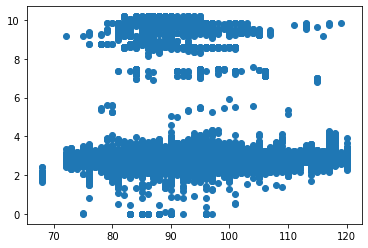

In [25]:
plt.scatter(df['DspPressure'], df['die1_Area'])

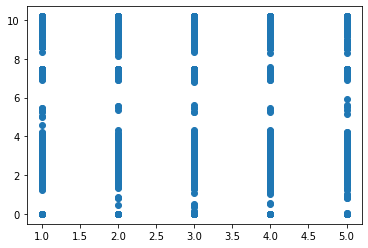

In [26]:
plt.scatter(df['rows'], df['die1_Area'])

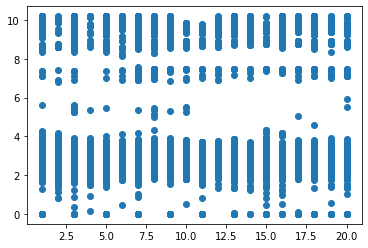

In [27]:
plt.scatter(df['cols'], df['die1_Area'])

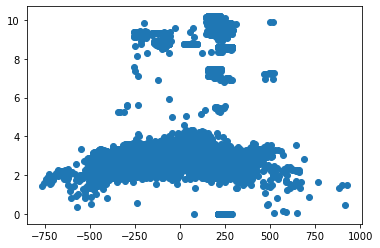

In [28]:
plt.scatter(df['die1_X'], df['die1_Area'])

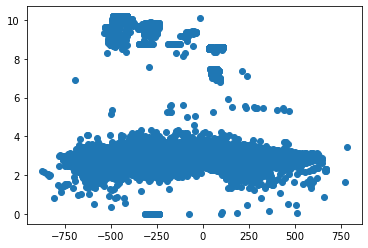

In [29]:
plt.scatter(df['die1_Y'], df['die1_Area'])

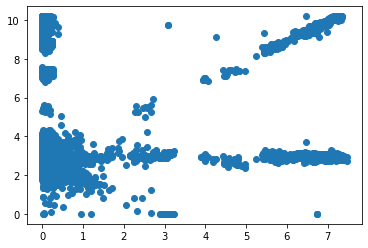

In [30]:
plt.scatter(output2['Area_dev'], df['die1_Area'])

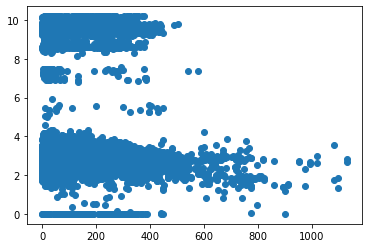

In [31]:
plt.scatter(output2['X_dev'], df['die1_Area'])

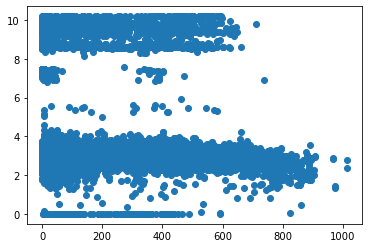

In [32]:
plt.scatter(output2['Y_dev'], df['die1_Area'])

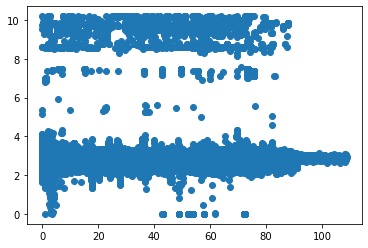

In [33]:
plt.scatter(output2['amt_used'], df['die1_Area'])

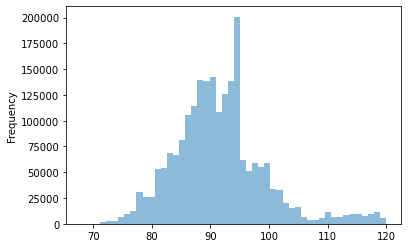

In [34]:
ax=df['DspPressure'].plot.hist(bins=50,alpha=0.5)

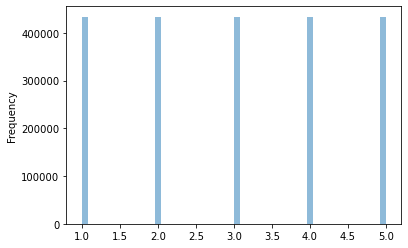

In [35]:
ax=df['rows'].plot.hist(bins=50,alpha=0.5)

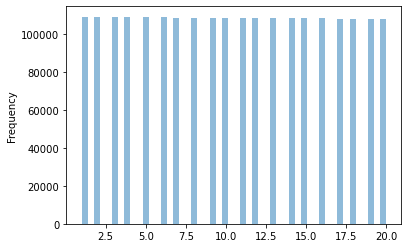

In [36]:
ax=df['cols'].plot.hist(bins=50,alpha=0.5)

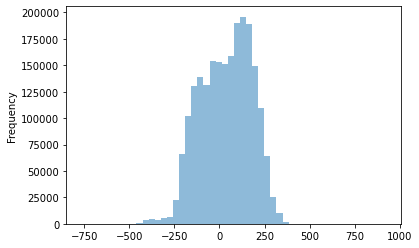

In [37]:
ax=df['die1_X'].plot.hist(bins=50,alpha=0.5)

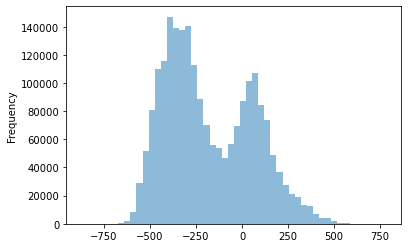

In [38]:
ax=df['die1_Y'].plot.hist(bins=50,alpha=0.5)

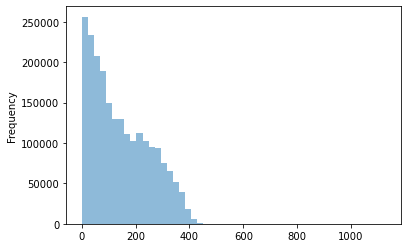

In [39]:
ax=output2['X_dev'].plot.hist(bins=50,alpha=0.5)

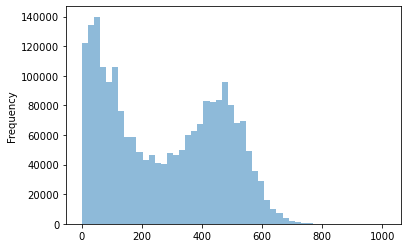

In [40]:
ax=output2['Y_dev'].plot.hist(bins=50,alpha=0.5)

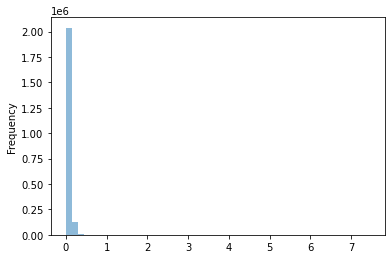

In [41]:
ax=output2['Area_dev'].plot.hist(bins=50,alpha=0.5)

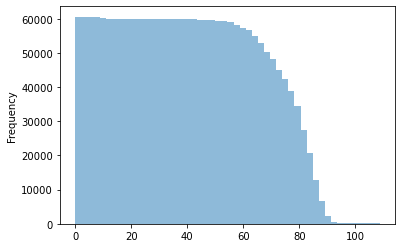

In [42]:
ax=output2['amt_used'].plot.hist(bins=50,alpha=0.5)

In [43]:
X = output2[['DspPressure','rows','cols','die1_X','die1_Y','amt_used','Y_dev','X_dev','Area_dev']]
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                    for i in range(len(X.columns))]
  
print(vif)

       feature        VIF
0  DspPressure  15.481887
1         rows   5.357974
2         cols   4.205744
3       die1_X   1.119692
4       die1_Y   1.678437
5     amt_used   3.869984
6        Y_dev   3.173649
7        X_dev   2.878438
8     Area_dev   1.102173


In [44]:
#durbin-watson method
model = ols('die1_Area ~ DspPressure + rows + cols + die1_X + die1_Y + amt + amt_used+ Y_dev+ X_dev + Area_dev', data=output2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              die1_Area   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                 5.547e+04
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:41:35   Log-Likelihood:             2.4098e+05
No. Observations:             2168780   AIC:                        -4.819e+05
Df Residuals:                 2168769   BIC:                        -4.818e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.8339      0.002   1575.287      

In [45]:
#breusch-pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = het_breuschpagan(model.resid, model.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', -5130.186919426987),
 ('p-value', 1.0),
 ('f-value', -731.1516240292551),
 ('f p-value', 1.0)]